# **Lab #3: Dynamic Programming & Basic Q-Learning**

## **The Bellman equation**


1.   helps us solve the Markov decision process (MDP)
2.  solve the MDP, we mean finding the optimal policy.

The Bellman equation is **ubiquitous
in reinforcement learning** and is widely used for **finding the optimal value and Q functions recursively**. Computing the optimal value and Q functions is very
important because once we have the **optimal value or optimal Q function**, then
we can use them to **derive the optimal policy.**

##*V(s) = R(s,a,s') + 𝛾V(s')*

In the above equation, the following applies:

*   𝑅(s,a,s') implies the immediate reward obtained while performing an action a in state s and moving to the next state 𝑠′
*   𝛾 is the discount factor
* V(s') implies the value of the next state

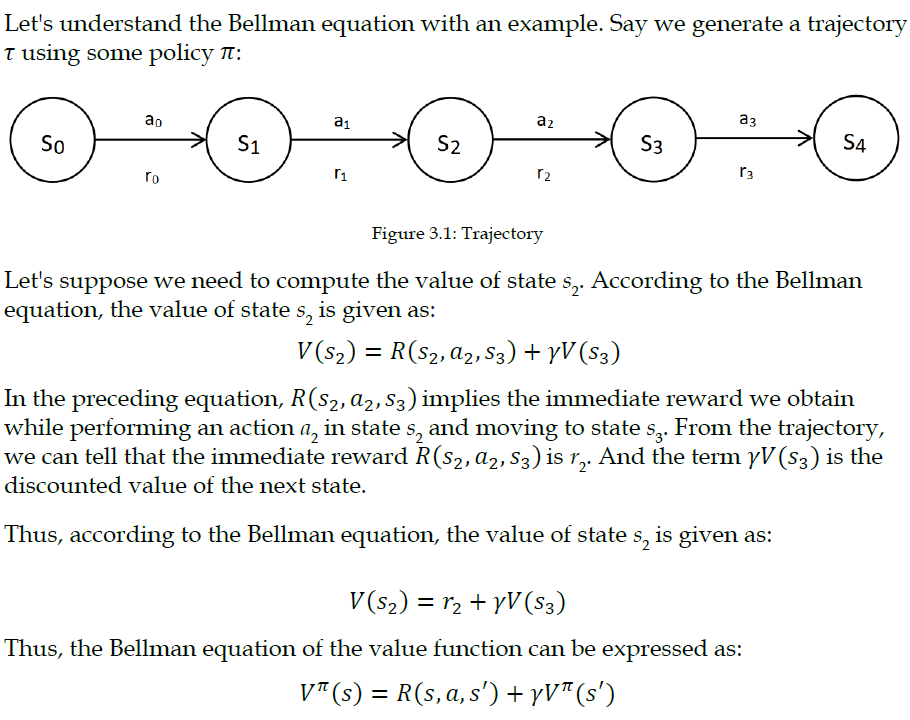

Where the superscript 𝜋 implies that we are using policy 𝜋 . The right-hand side term is often called the  **Bellman backup**.
The preceding Bellman equation works only when we have a **deterministic
environment**.

Let's suppose our environment is stochastic, then in that case, when we
perform an action a in state s, it is not guaranteed that our next state will always be 𝑠′; it could be some other states too.

As we can see, when we perform an action a1 in state s1, with a probability 0.7, we
reach state s2, and with a probability 0.3, we reach state s3:

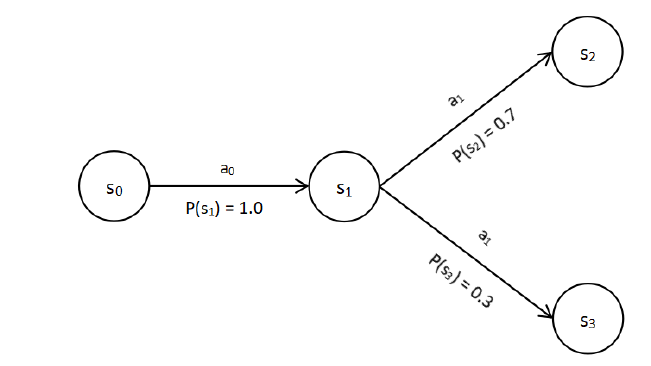

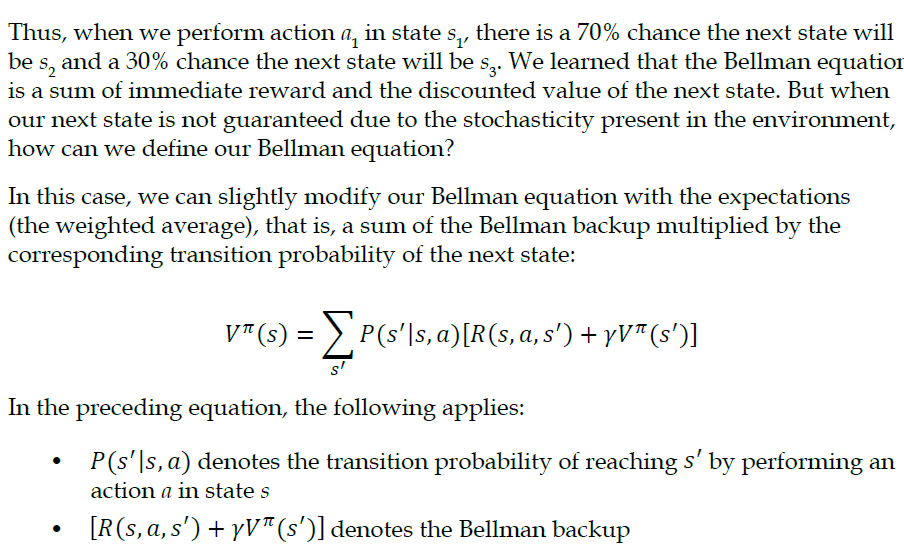

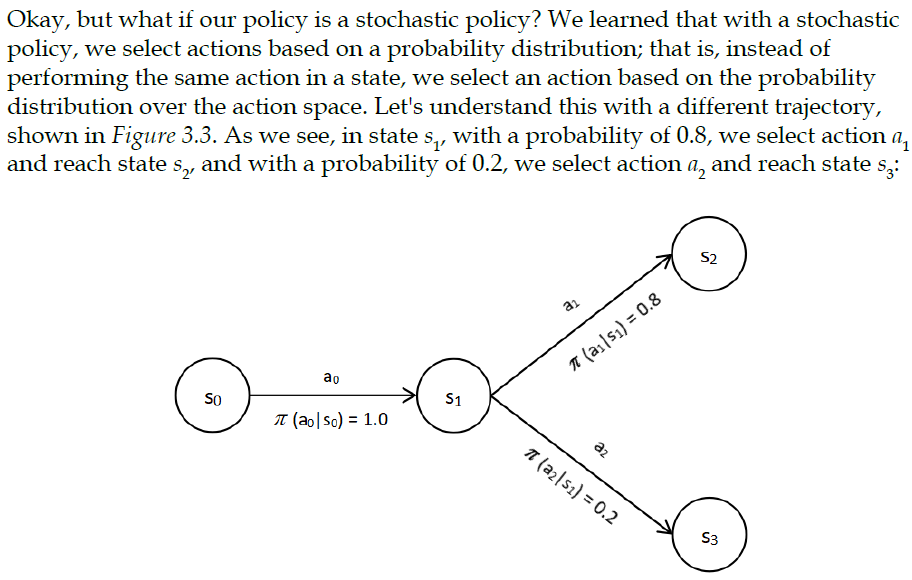

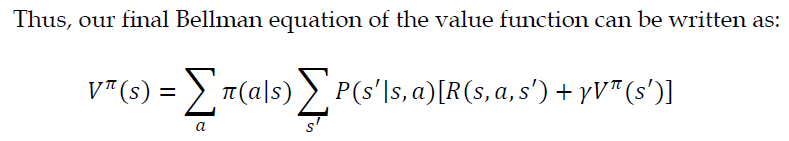

##The Bellman equation of the Q function

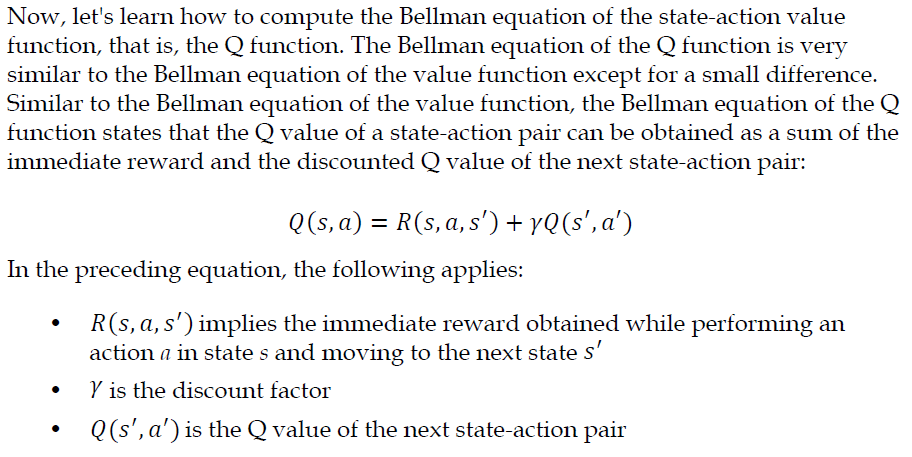

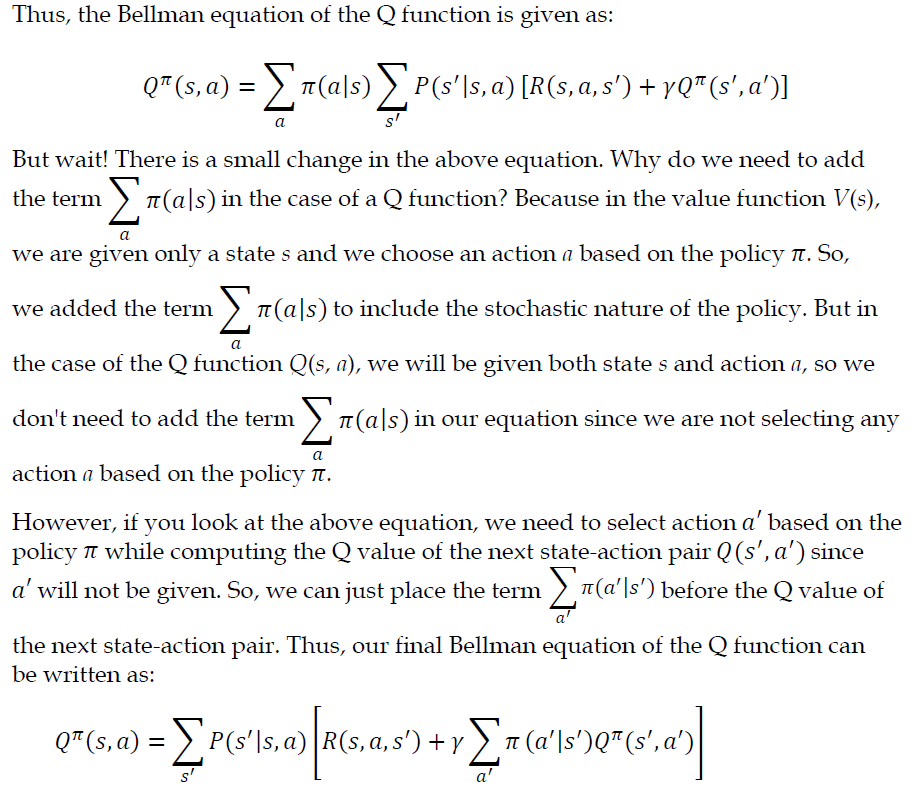

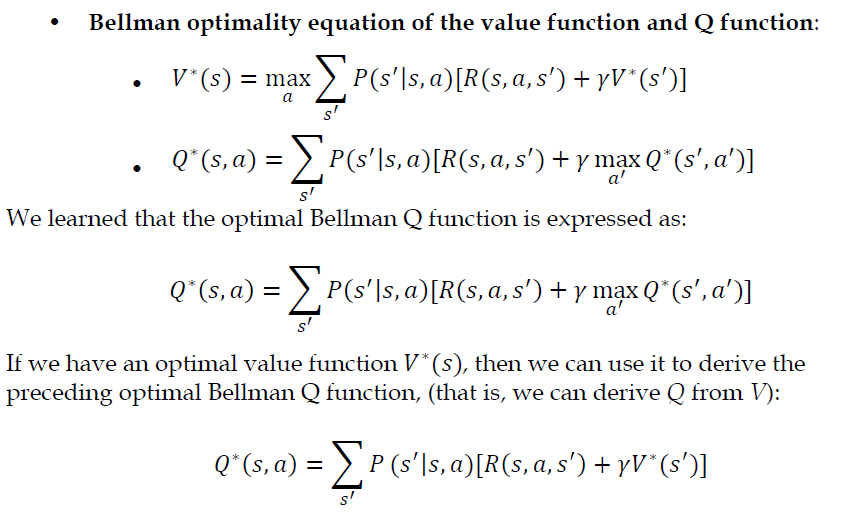

#**Value Iteration**

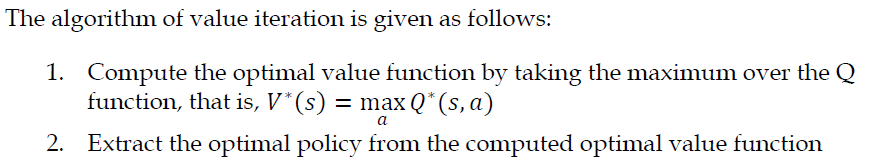

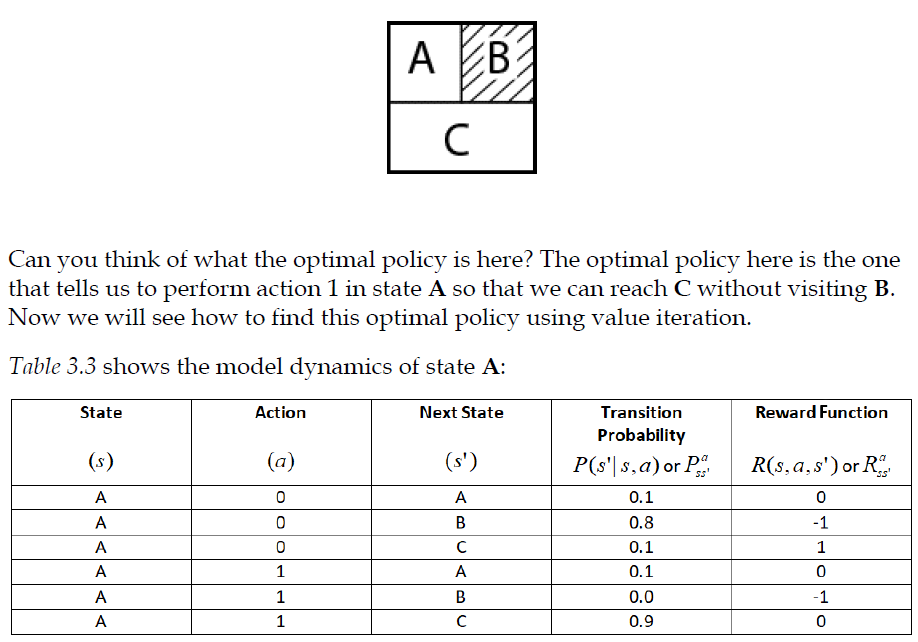

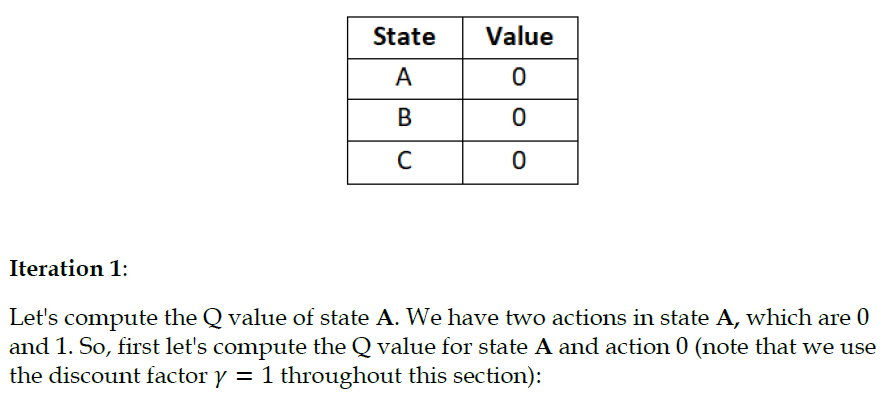

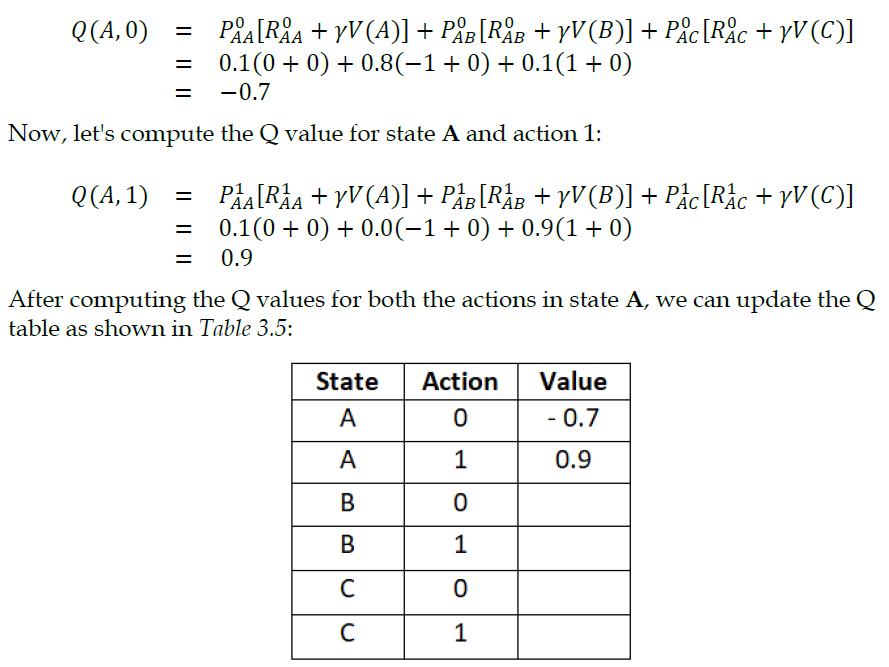

##**Extract the optimal policy from the optimal value function obtained from previous step**

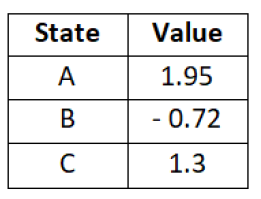

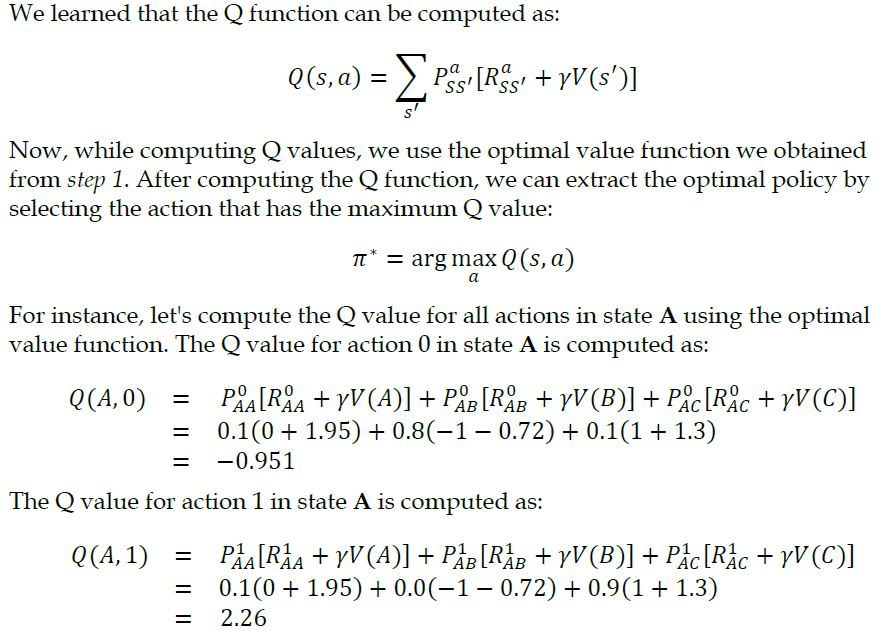

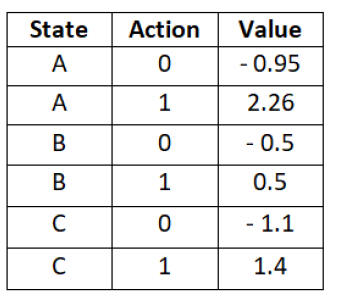

##**Solving the Frozen Lake problem with value iteration**

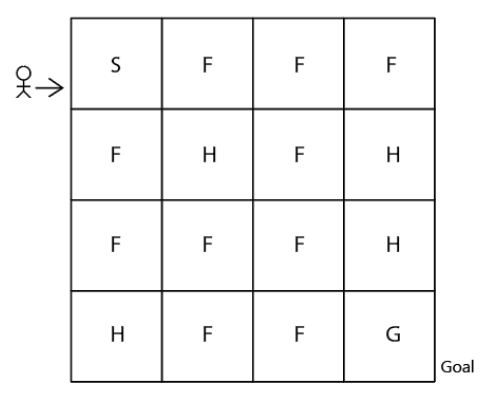

Actions we can perform:

0: Move left

1: Move down

2: Move right

3: Move up

In [36]:
!pip install gymnasium

In [37]:
import gym
import numpy as np

In [38]:
env = gym.make('FrozenLake-v1',is_slippery=True)

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [39]:
env.reset()
env.render()

/usr/local/lib/python3.11/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


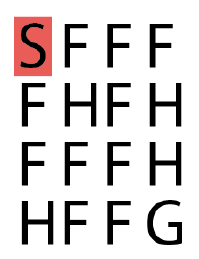

In [40]:
nb_states = env.observation_space.n
nb_actions = env.action_space.n

print(nb_states)
print(nb_actions)

16
4


In [41]:
for state in env.P:
    print(f"State {state}:")
    for action in env.P[state]:
        print(f"  Action {action}: {env.P[state][action]}")

State 0:
  Action 0: [(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 4, 0.0, False)]
  Action 1: [(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False)]
  Action 2: [(0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False)]
  Action 3: [(0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False)]
State 1:
  Action 0: [(0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 5, 0.0, True)]
  Action 1: [(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 5, 0.0, True), (0.3333333333333333, 2, 0.0, False)]
  Action 2: [(0.3333333333333333, 5, 0.0, True), (0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 1, 0.0, False)]
  Action 3: [(0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, F

In [ ]:
env1 = gym.make('FrozenLake-v1',is_slippery=False)
env1.reset()
env1.render()
for state in env1.unwrapped.P:
    print(f"State {state}:")
    for action in env1.unwrapped.P[state]:
        print(f"  Action {action}: {env1.unwrapped.P[state][action]}")

State 0:
  Action 0: [(1.0, 0, 0.0, False)]
  Action 1: [(1.0, 4, 0.0, False)]
  Action 2: [(1.0, 1, 0.0, False)]
  Action 3: [(1.0, 0, 0.0, False)]
State 1:
  Action 0: [(1.0, 0, 0.0, False)]
  Action 1: [(1.0, 5, 0.0, True)]
  Action 2: [(1.0, 2, 0.0, False)]
  Action 3: [(1.0, 1, 0.0, False)]
State 2:
  Action 0: [(1.0, 1, 0.0, False)]
  Action 1: [(1.0, 6, 0.0, False)]
  Action 2: [(1.0, 3, 0.0, False)]
  Action 3: [(1.0, 2, 0.0, False)]
State 3:
  Action 0: [(1.0, 2, 0.0, False)]
  Action 1: [(1.0, 7, 0.0, True)]
  Action 2: [(1.0, 3, 0.0, False)]
  Action 3: [(1.0, 3, 0.0, False)]
State 4:
  Action 0: [(1.0, 4, 0.0, False)]
  Action 1: [(1.0, 8, 0.0, False)]
  Action 2: [(1.0, 5, 0.0, True)]
  Action 3: [(1.0, 0, 0.0, False)]
State 5:
  Action 0: [(1.0, 5, 0, True)]
  Action 1: [(1.0, 5, 0, True)]
  Action 2: [(1.0, 5, 0, True)]
  Action 3: [(1.0, 5, 0, True)]
State 6:
  Action 0: [(1.0, 5, 0.0, True)]
  Action 1: [(1.0, 10, 0.0, False)]
  Action 2: [(1.0, 7, 0.0, True)]
  Action

/usr/local/lib/python3.11/dist-packages/gymnasium/envs/toy_text/frozen_lake.py:334: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("FrozenLake-v1", render_mode="rgb_array")
  gym.logger.warn(


# Using Value Iteration

In [59]:
def value_iteration(env):
  num_iterations = 1000
  threshold = 1e-20 #value used to terminate if no changes observed in the new values from the previous values
  gamma = 1.0 #discount factor
  value_table = np.zeros(env.observation_space.n)
  print('Initial Value Table: ', value_table)
  for i in range(num_iterations):
    updated_value_table = np.copy(value_table)
    for s in range(env.observation_space.n):
      Q_values = [sum([prob*(r + gamma * updated_value_table[s_])
                for prob, s_, r, _ in env.unwrapped.P[s][a]])
                for a in range(env.action_space.n)]
      value_table[s] = max(Q_values)
      print(f'Value Table for State {s}', value_table[s])
    if (np.sum(np.fabs(updated_value_table - value_table)) <= threshold):
      break
  return value_table

In [63]:
def extract_policy(value_table):
  gamma = 1.0
  policy = np.zeros(env.observation_space.n)
  for s in range(env.observation_space.n):
    Q_values = [sum([prob*(r + gamma * value_table[s_])
                for prob, s_, r, _ in env.unwrapped.P[s][a]])
                for a in range(env.action_space.n)]
    policy[s] = np.argmax(np.array(Q_values))
  return policy

In [61]:
optimal_value_function = value_iteration(env)
print('optimal value function', optimal_value_function)

Streaming output truncated to the last 5000 lines.
Value Table for State 11 0.0
Value Table for State 12 0.0
Value Table for State 13 0.8823529234626442
Value Table for State 14 0.9411764613968037
Value Table for State 15 0.0
Value Table for State 0 0.8235293704637667
Value Table for State 1 0.8235293566194746
Value Table for State 2 0.8235293467891583
Value Table for State 3 0.8235293416883588
Value Table for State 4 0.8235293734700282
Value Table for State 5 0.0
Value Table for State 6 0.5294117351749001
Value Table for State 7 0.0
Value Table for State 8 0.8235293792637276
Value Table for State 9 0.8235293874231464
Value Table for State 10 0.7647058608850782
Value Table for State 11 0.0
Value Table for State 12 0.0
Value Table for State 13 0.8823529238924358
Value Table for State 14 0.9411764616198159
Value Table for State 15 0.0
Value Table for State 0 0.8235293714658538
Value Table for State 1 0.8235293579574665
Value Table for State 2 0.8235293483656638
Value Table for State 3 0.

In [64]:
optimal_policy = extract_policy(optimal_value_function)

In [65]:
print(optimal_policy.reshape(4,4))

[[0. 3. 3. 3.]
 [0. 0. 0. 0.]
 [3. 1. 0. 0.]
 [0. 2. 1. 0.]]


##Using Policy Iteration

In [47]:
import gym
import numpy as np

In [48]:
env = gym.make('FrozenLake-v1')

In [70]:
def compute_value_function(policy):
  num_iterations = 1000
  threshold = 1e-20
  gamma = 1.0
  value_table = np.zeros(env.observation_space.n)
  for i in range(num_iterations):
    updated_value_table = np.copy(value_table)
    for s in range(env.observation_space.n):
      a = policy[s]
      value_table[s] = sum([prob * (r + gamma * updated_value_table[s_])
                  for prob, s_, r, _ in env.unwrapped.P[s][a]])
    if (np.sum(np.fabs(updated_value_table - value_table)) <= threshold):
      break

  return value_table

In [71]:
def extract_policy(value_table):
  gamma = 1.0
  policy = np.zeros(env.observation_space.n)
  for s in range(env.observation_space.n):
    Q_values = [sum([prob*(r + gamma * value_table[s_])
          for prob, s_, r, _ in env.unwrapped.P[s][a]])
          for a in range(env.action_space.n)]
    policy[s] = np.argmax(np.array(Q_values))
  return policy

In [72]:
def policy_iteration(env):
  num_iterations = 1000
  policy = np.zeros(env.observation_space.n)
  for i in range(num_iterations):
    value_function = compute_value_function(policy)
    print('Value Function ', value_function)
    new_policy = extract_policy(value_function)
    print('New Policy Function ', new_policy)
    if (np.all(policy == new_policy)):
      break
    policy = new_policy
  return policy

In [73]:
optimal_policy = policy_iteration(env)

Value Function  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
New Policy Function  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Value Function  [0.         0.         0.03846154 0.01923077 0.         0.
 0.07692308 0.         0.         0.         0.19230769 0.
 0.         0.         0.5        0.        ]
New Policy Function  [0. 1. 2. 3. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 2. 0.]
Value Function  [0.         0.06140351 0.18421053 0.18421053 0.         0.
 0.18421053 0.         0.         0.23684211 0.36842105 0.
 0.         0.34210526 0.68421053 0.        ]
New Policy Function  [1. 2. 2. 3. 0. 0. 0. 0. 1. 1. 0. 0. 0. 2. 2. 0.]
Value Function  [0.14393939 0.11363636 0.22727273 0.22727273 0.17424242 0.
 0.22727273 0.         0.20454545 0.40909091 0.45454545 0.
 0.         0.56818182 0.72727273 0.        ]
New Policy Function  [0. 3. 2. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]
Value Function  [0.75       0.54166667 0.33333333 0.33333333 0.75       0.
 0.33333333 0.         0.75       0

In [53]:
print(optimal_policy.reshape(4,4))

[[0. 3. 3. 3.]
 [0. 0. 0. 0.]
 [3. 1. 0. 0.]
 [0. 2. 1. 0.]]


# Q-Learning

In [74]:
!pip install gymnasium

Streaming output truncated to the last 5000 lines.
Reward 0.0
Done False
***Action:0***
Next State 9
Reward 0.0
Done False
***Action:1***
Next State 8
Reward 0.0
Done False
***Action:3***
Next State 8
Reward 0.0
Done False
***Action:3***
Next State 4
Reward 0.0
Done False
***Action:0***
Next State 4
Reward 0.0
Done False
***Action:0***
Next State 4
Reward 0.0
Done False
***Action:0***
Next State 4
Reward 0.0
Done False
***Action:0***
Next State 0
Reward 0.0
Done False
***Action:0***
Next State 0
Reward 0.0
Done False
***Action:0***
Next State 4
Reward 0.0
Done False
***Action:0***
Next State 4
Reward 0.0
Done False
***Action:0***
Next State 0
Reward 0.0
Done False
***Action:0***
Next State 0
Reward 0.0
Done False
***Action:0***
Next State 4
Reward 0.0
Done False
***Action:0***
Next State 4
Reward 0.0
Done False
***Action:0***
Next State 0
Reward 0.0
Done False
***Action:0***
Next State 0
Reward 0.0
Done False
***Action:0***
Next State 4
Reward 0.0
Done False
***Action:0***
Next State 4

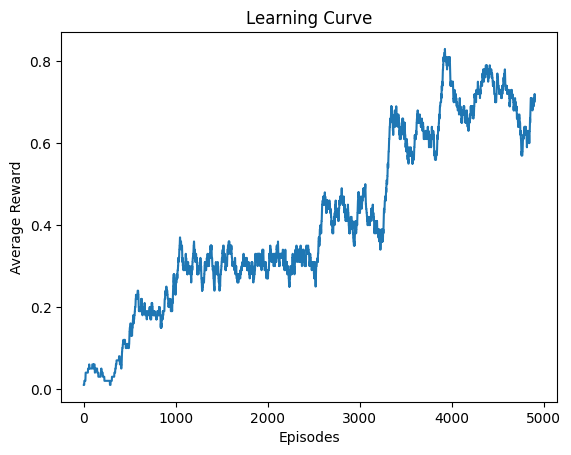

In [76]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# Set up FrozenLake environment
env = gym.make("FrozenLake-v1", is_slippery=True)
n_states = env.observation_space.n
n_actions = env.action_space.n

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration probability
epsilon_decay = 0.995
min_epsilon = 0.01
episodes = 5000

# Initialize Q-table
Q = np.zeros((n_states, n_actions))

# Store rewards to plot learning progress
rewards = []

# Q-learning process
for episode in range(episodes):
    state = env.reset()[0]  # Get initial state (compatible with gym API)
    done = False
    total_reward = 0

    while not done:
        # Epsilon-greedy policy
        if np.random.random() < epsilon:
            action = np.random.choice(n_actions)  # Explore
        else:
            action = np.argmax(Q[state, :])  # Exploit

        # Take action and observe result
        print(f"***Action:{action}***")
        next_state, reward, done, _, _ = env.g(action)
        print('Next State', next_state)
        print('Reward', reward)
        print('Done', done)

        # Update Q-value using the Bellman equation
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

        # Move to the next state
        state = next_state
        total_reward += reward

    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    # Track rewards
    rewards.append(total_reward)

# Display final Q-table
print("Final Q-table:")
print(Q)

# Derive policy
policy = np.argmax(Q, axis=1)
print("Derived policy:")
print(policy.reshape(4,4))

# Plot learning curve
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.title("Learning Curve")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.show()


## **Additional Exercises:-**
1. **Gambler’s Problem from Sutton's book.**

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of $100, or loses by running out of money.
On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. This problem can be formulated as an undiscounted, episodic, finite MDP.
The state is the gambler’s capital, s ∈ {1, 2, . . . , 99}. The actions are stakes, a ∈ {0, 1, . . . , min(s, 100 − s)}. The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1.
The state-value function then gives the probability of winning from each state. A policy is a mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal. Let p_h denote the probability of the coin coming up heads. If p_h is known, then the entire problem is known and it can be solved, for instance, by value iteration.
Code Template: [GamblerProblem.ipynb](https://colab.research.google.com/drive/13-yugWDDlV3ZWQZ1zowK4zk9id-W1EoN#scrollTo=JvOkw0iWnlAo)




2. **Taxi problem**

The Taxi problem is a navigation task set in a 8x8 grid world where the goal is to move a taxi to pick up a passenger and drop them off at a specified destination. The grid consists of four designated locations (Red, Green, Yellow, and Blue) where the passenger can be picked up or dropped off. The taxi starts at a random location, and the passenger is initially located at one of the four designated locations. The objective is to drive the taxi to the passenger's location, pick them up, then drive to their desired destination and drop them off. The episode ends when the passenger is successfully dropped off. There are six possible actions the agent (the taxi) can take:
  1. Move south (down)
  2. Move north (up)
  3. Move east (right)
  4. Move west (left)
  5. Pick up the passenger
  6. Drop off the passenger

The state of the system is represented by the taxi's position on the grid (a row and column number between 0 and 7), the passenger's current location (which can be one of the four designated spots or inside the taxi), and the passenger's destination (one of the four possible locations). Therefore, there are a total of 500 discrete states, derived by combining the taxi's location (64 possibilities), the passenger's location (8 possibilities), and the passenger's destination (4 possibilities).
An observation is encoded as an integer, calculated by: ((taxi_row * 8 + taxi_col) * 8 + passenger_location) * 4 + destination
The agent receives positive rewards for successfully dropping off the passenger at the correct destination. Negative rewards are given for unsuccessful pick-up or drop-off attempts, as well as for each step the taxi takes without receiving a reward (e.g., moving without a successful pick-up or drop-off).
Code Template:
[Taxi-Problem.ipynb](https://colab.research.google.com/drive/1BqoZBq09qKRXSn0YH0syyyt6bhsvtLwX#scrollTo=Og5oHscctdoa)




References:-
1. https://github.com/PacktPublishing/Python-Reinforcement-Learning
2. https://www.deeplearningwizard.com/deep_learning/deep_reinforcement_learning_pytorch/dynamic_programming_frozenlake/#deterministic-policy-environment
3. https://medium.com/@numsmt2/reinforcement-learning-chapter-4-dynamic-programming-part-1-policy-iteration-2a1f66a5ca42
4. Chapter-3,4 of Introduction to Reinforcement Learning,2nd Ed., Sutton & Barto
